In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])


Saving all_stocks_5yr.csv to all_stocks_5yr (1).csv


In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head(50000))

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check data types
print("\nData types of the columns:")
print(df.dtypes)
print(df.dropna(inplace=True))


First few rows of the dataset:
             date    open     high     low   close    volume  Name
0      2013-02-08   15.07   15.120   14.63   14.75   8407500   AAL
1      2013-02-11   14.89   15.010   14.26   14.46   8882000   AAL
2      2013-02-12   14.45   14.510   14.10   14.27   8126000   AAL
3      2013-02-13   14.30   14.940   14.25   14.66  10259500   AAL
4      2013-02-14   14.94   14.960   13.16   13.99  31879900   AAL
...           ...     ...      ...     ...     ...       ...   ...
49995  2017-06-08  128.53  128.750  126.00  126.96    613502  ANSS
49996  2017-06-09  127.30  127.660  122.89  124.52    583548  ANSS
49997  2017-06-12  123.64  124.120  120.00  122.40   1121098  ANSS
49998  2017-06-13  122.69  122.725  121.01  122.47    692829  ANSS
49999  2017-06-14  122.66  124.240  121.69  122.74    825871  ANSS

[50000 rows x 7 columns]

Missing values in the dataset:
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Summary s

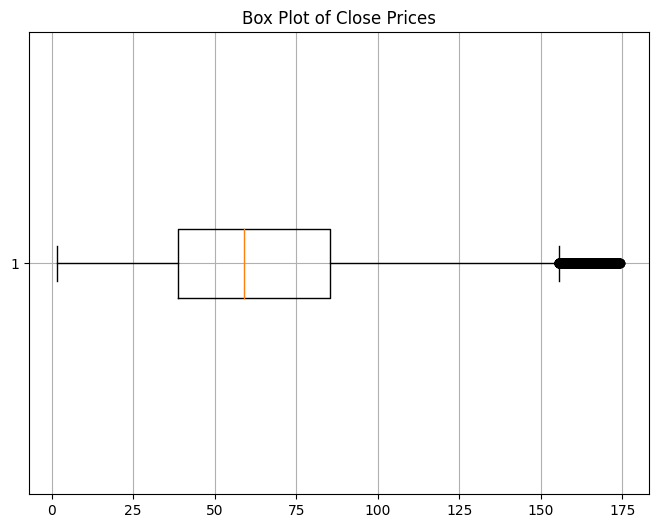

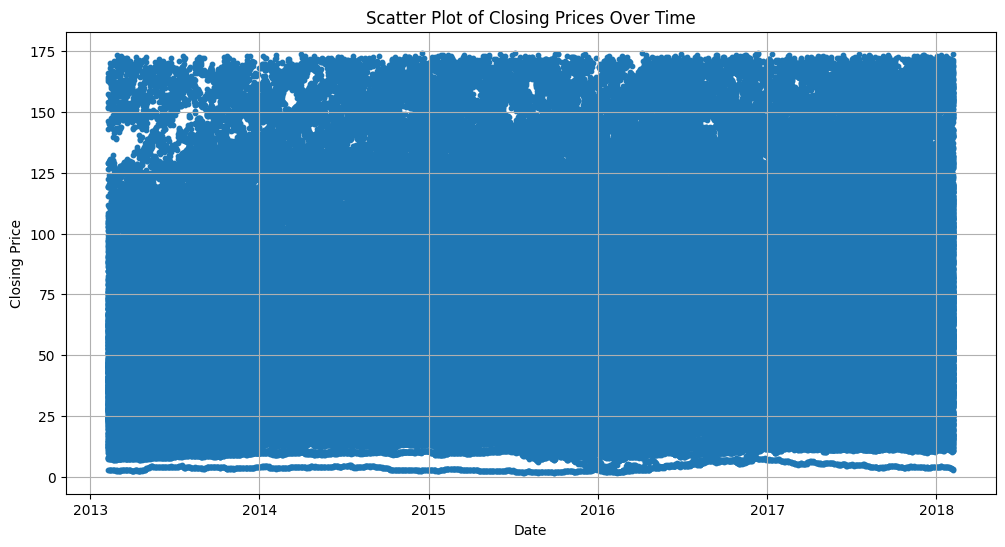

In [86]:
import matplotlib.pyplot as plt

# Box plot to visualize 'Close' prices
plt.figure(figsize=(8, 6))
plt.boxplot(df['close'], vert=False)
plt.title('Box Plot of Close Prices')
plt.grid(True)
plt.show()

# Scatter plot to visualize 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['close'], s=10)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Scatter Plot of Closing Prices Over Time')
plt.grid(True)
plt.show()


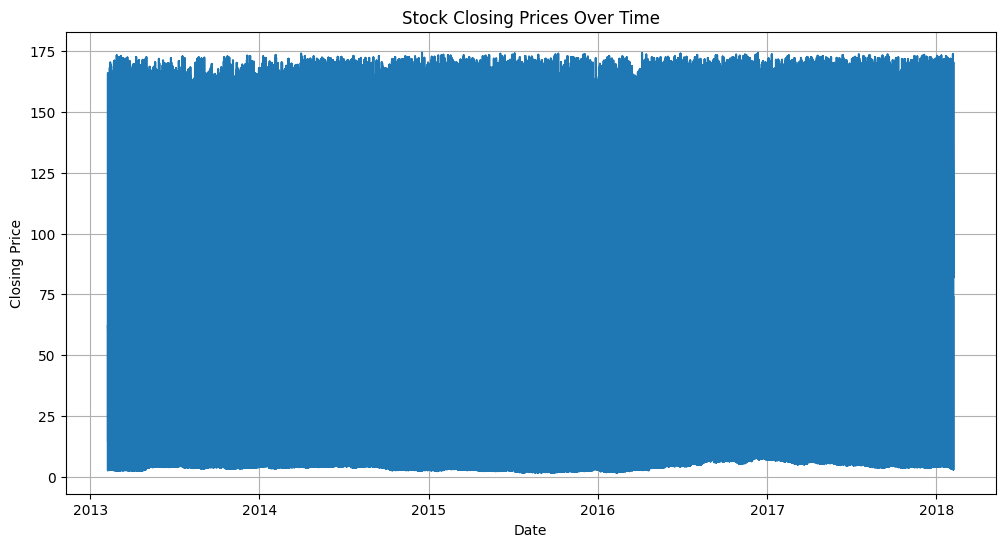

In [92]:
import matplotlib as mpl

# Increase the chunk size (adjust the value as needed)
mpl.rcParams['agg.path.chunksize'] = 20000

# Create your plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.grid(True)
plt.show()


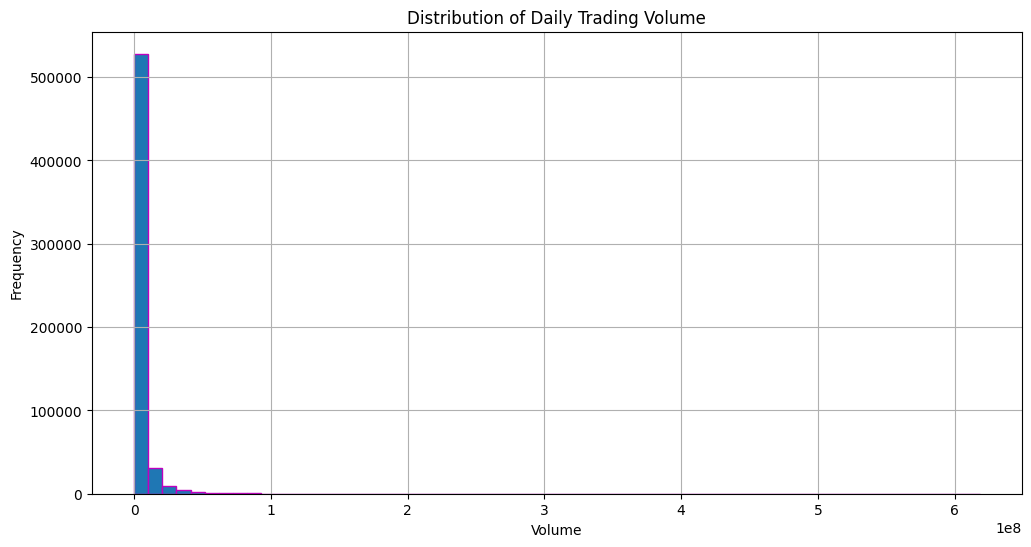

In [87]:
# Create a histogram of daily trading volume
plt.figure(figsize=(12, 6))
plt.hist(df['volume'], bins=60, edgecolor='m')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Trading Volume')
plt.grid(True)
plt.show()


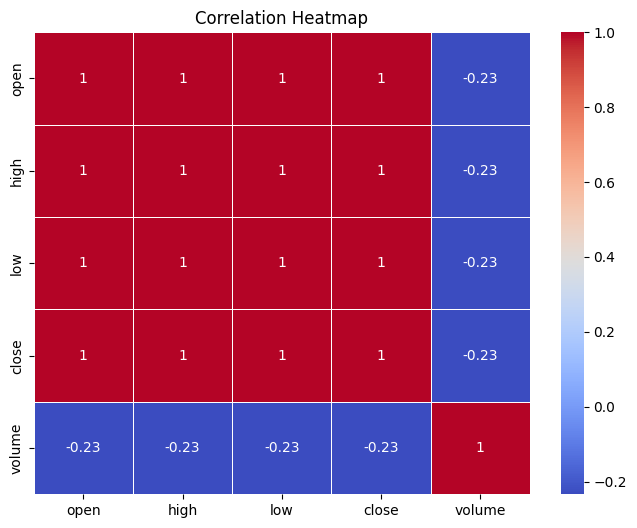

In [88]:
#correlation

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



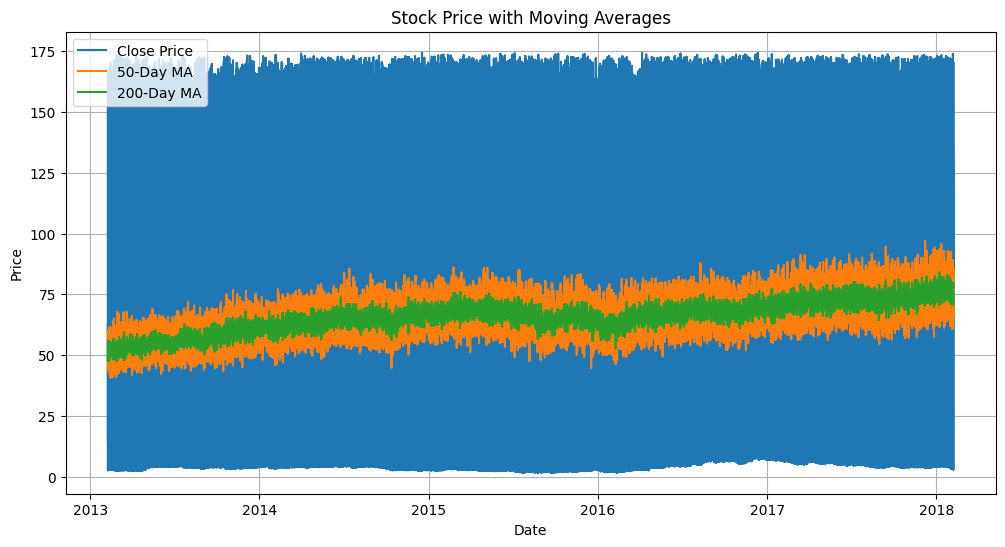

In [89]:
#moving avg
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')
df['50_Day_MA'] = df['close'].rolling(window=50).mean()
df['200_Day_MA'] = df['close'].rolling(window=200).mean()
plt.plot(df['date'], df['50_Day_MA'], label='50-Day MA')
plt.plot(df['date'], df['200_Day_MA'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


In [90]:
# Check if the 'Date' column is sorted in ascending order
is_sorted = df['date'].is_monotonic_increasing

if is_sorted:
    print("The 'Date' column is properly sorted in ascending order.")
else:
    print("The 'Date' column is not sorted in ascending order. Sorting the DataFrame...")
    df.sort_values(by='date', inplace=True)


The 'Date' column is properly sorted in ascending order.


import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a line plot for closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.grid(True)
plt.show()


In [77]:
from scipy import stats

z_scores = stats.zscore(df['close'])
threshold = 3  # Adjust the threshold as needed

outliers = df['close'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    # To remove outliers, you can filter the DataFrame
    # df = df[abs(z_scores) <= threshold]


Outliers:
307723    180.4398
83264     178.1000
83266     178.0000
83269     182.6800
478042    178.5100
            ...   
21401     182.0100
352426    178.3400
515777    182.6900
219867    180.1800
21402     181.4900
Name: close, Length: 2950, dtype: float64


In [78]:
from scipy import stats

z_scores = stats.zscore(df['high'])
threshold = 3  # Adjust the threshold as needed

outliers = df['high'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    # To remove outliers, you can filter the DataFrame
    # df = df[abs(z_scores) <= threshold]


Outliers:
478009    182.5900
307721    192.2865
307723    184.2865
83269     184.1700
478042    180.7500
            ...   
515777    185.3800
219867    185.0817
21402     184.1200
352427    179.4300
129408    179.6700
Name: high, Length: 2975, dtype: float64


In [79]:
from scipy import stats

z_scores = stats.zscore(df['low'])
threshold = 3  # Adjust the threshold as needed

outliers = df['low'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    # To remove outliers, you can filter the DataFrame
    # df = df[abs(z_scores) <= threshold]


Outliers:
486821    176.6600
486822    176.2000
486823    176.5300
307723    176.7498
486838    176.4300
            ...   
467757    180.9254
452649    177.7710
21401     178.8000
219867    179.9500
21402     181.3900
Name: low, Length: 2904, dtype: float64


In [80]:
from scipy import stats

z_scores = stats.zscore(df['open'])
threshold = 3  # Adjust the threshold as needed

outliers = df['open'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    # To remove outliers, you can filter the DataFrame
    # df = df[abs(z_scores) <= threshold]



Outliers:
478009    180.0000
307721    191.1465
307723    183.6731
307724    177.7565
486839    177.8100
            ...   
472794    181.7800
294262    179.5800
515777    179.7900
219867    184.1500
21402     181.4900
Name: open, Length: 2969, dtype: float64


In [81]:
from scipy import stats

z_scores = stats.zscore(df['close'])
threshold = 3  # Adjust the threshold as needed

outliers = df['close'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    # To remove outliers, you can filter the DataFrame
    df = df[abs(z_scores) <= threshold]  # Corrected indentation


Outliers:
307723    180.4398
83264     178.1000
83266     178.0000
83269     182.6800
478042    178.5100
            ...   
21401     182.0100
352426    178.3400
515777    182.6900
219867    180.1800
21402     181.4900
Name: close, Length: 2950, dtype: float64


In [82]:
from scipy import stats

z_scores = stats.zscore(df['open'])
threshold = 3  # Adjust the threshold as needed

outliers = df['open'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    # To remove outliers, you can filter the DataFrame
    df = df[abs(z_scores) <= threshold]  # Corrected indentation


Outliers:
486821    176.74
486822    177.50
478009    180.00
486823    177.36
486824    176.99
           ...  
42609     176.25
472794    181.78
294262    179.58
352427    175.83
129408    175.90
Name: open, Length: 1747, dtype: float64


In [83]:
z_scores = stats.zscore(df['high'])
threshold = 3  # Adjust the threshold as needed

outliers = df['high'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    df = df[abs(z_scores) <= threshold]

Outliers:
486834    174.7900
486835    174.6500
486836    174.8100
478024    175.8800
307728    174.5832
            ...   
472793    174.5000
129407    180.8700
593928    176.4600
568748    176.0600
342355    174.8350
Name: high, Length: 999, dtype: float64


In [84]:
z_scores = stats.zscore(df['low'])
threshold = 3  # Adjust the threshold as needed

outliers = df['low'][abs(z_scores) > threshold]

# Print and optionally remove outliers
if not outliers.empty:
    print("Outliers:")
    print(outliers)
    df = df[abs(z_scores) <= threshold]

Outliers:
83255     171.0000
83256     171.2200
83257     171.4200
478028    170.8100
486844    172.6101
            ...   
310212    170.7300
310213    170.9300
310214    172.2000
64046     171.3000
510736    170.9700
Name: low, Length: 659, dtype: float64
